In [2]:
import json
import random

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
g = nx.Graph()

In [4]:
with open("imdb_movies_2000to2022.prolific.json", "r") as IMDB_file:
    for obj in IMDB_file:
        movie = json.loads(obj)
        if 'Drama' in movie.get('genres', []):
            actors = [actor[1] for actor in movie.get('actors', [])]
            for actor in actors:
                g.add_node(actor, name = actor)
            for i in range(len(actors)):
                for j in range(i + 1, len(actors)):
                    g.add_edge(actors[i], actors[j])

In [5]:
centrality_degree = nx.degree_centrality(g)
top_k = 100
# closeness_centrality = nx.closeness_centrality(g)
for u in sorted(centrality_degree, key = centrality_degree.get, reverse = True)[:top_k]:
    print(g.nodes[u]['name'], centrality_degree[u])

Eric Roberts 0.011551242154122053
Tony Devon 0.0077535735007120635
Tom Sizemore 0.00738435571496387
James Franco 0.006540429347539427
Michael Madsen 0.006276702357719289
Joe Hammerstone 0.0061184661638272065
Dean Cain 0.005116303602510681
Julianne Moore 0.004852576612690543
Willem Dafoe 0.004747085816762487
Bruce Dern 0.004747085816762487
Nicole Kidman 0.004641595020834432
Melissa Leo 0.0045888496228704044
Naomi Watts 0.004536104224906377
Ethan Hawke 0.0044306134289783215
Ed Harris 0.0043778680310142945
Cate Blanchett 0.004272377235086239
Peter Sarsgaard 0.004272377235086239
Clifton Powell 0.004272377235086239
Forest Whitaker 0.0042196318371222116
Danny Glover 0.0042196318371222116
Ewan McGregor 0.004166886439158184
C. Thomas Howell 0.004166886439158184
Theodore Bouloukos 0.004166886439158184
Susan Sarandon 0.004114141041194156
Michael Shannon 0.004061395643230129
Danny Trejo 0.004008650245266101
Colin Farrell 0.003955904847302073
Robert De Niro 0.003955904847302073
Anthony Hopkins 0.0

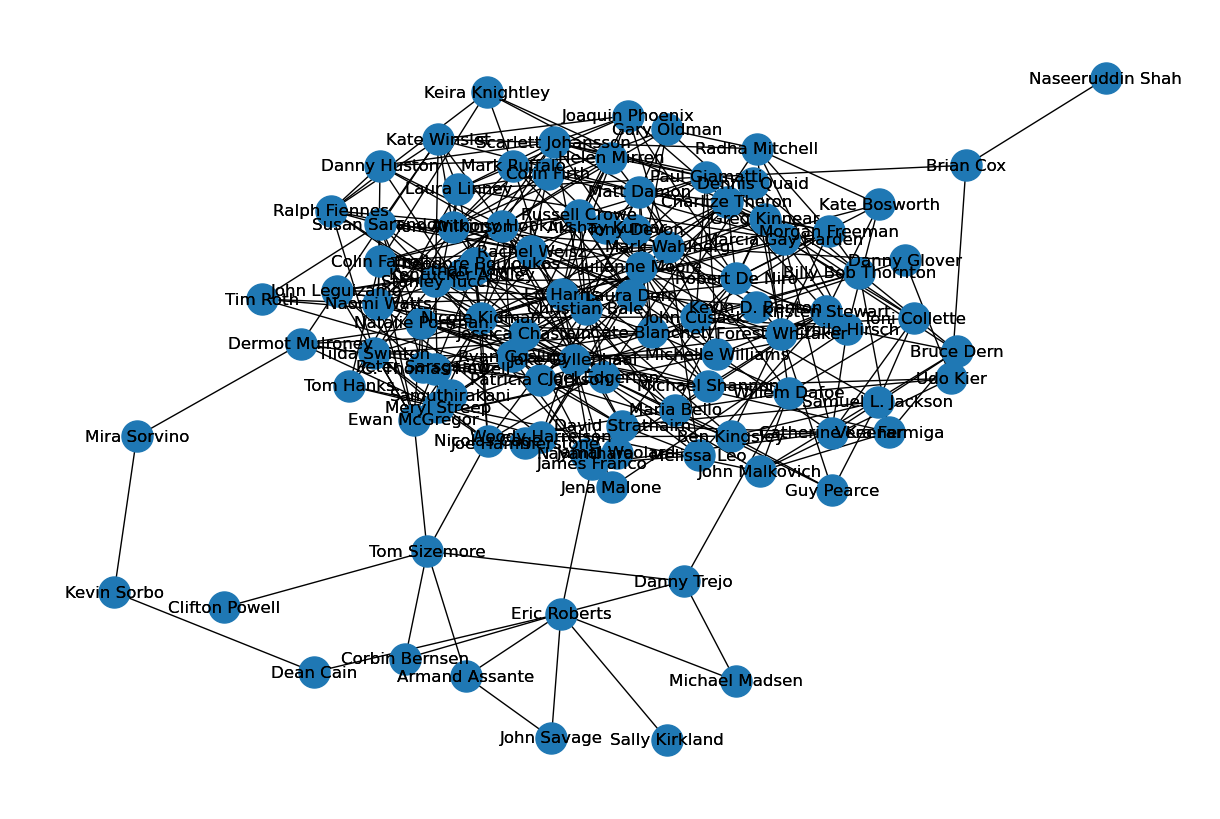

In [6]:
top_actors = sorted(centrality_degree, key = centrality_degree.get, reverse = True)[:top_k]
top_graph = g.subgraph(top_actors)
plt.figure(figsize = (12, 8))
pos = nx.kamada_kawai_layout(top_graph)
nx.draw(top_graph, pos, with_labels = True, node_size = 500, font_size = 12)
labels = {node:g.nodes[node]['name'] for node in top_graph.nodes()}
nx.draw_networkx_labels(top_graph, pos, labels, font_size = 12)
plt.show()

In [8]:
closeness_centrality = nx.closeness_centrality(g)
top_k = 100
for u in sorted(closeness_centrality, key = closeness_centrality.get, reverse = True)[:top_k]:
    print(g.nodes[u]['name'], closeness_centrality[u])

James Franco 0.2646217891033656
Tom Sizemore 0.26214898173537604
Eric Roberts 0.2583023011697346
Willem Dafoe 0.2572009030144158
Michael Shannon 0.25539088538821975
Nicole Kidman 0.2550554897411799
Julianne Moore 0.25448989950085077
Alec Baldwin 0.25437268887916614
Jessica Chastain 0.2541751405898722
Helen Mirren 0.2538502204854152
Anthony Hopkins 0.25344614530617615
Ed Harris 0.25325366191837306
Robert De Niro 0.2530940863616724
Ewan McGregor 0.25300712987997226
Nicolas Cage 0.25300712987997226
Catherine Keener 0.2517995704545667
Colin Farrell 0.25165973757811105
Gary Oldman 0.2514735351541773
Keira Knightley 0.25109125336547344
Michael Madsen 0.2508382305861021
Woody Harrelson 0.250809752939511
Josh Hartnett 0.25067101695816724
Forest Whitaker 0.250578611541529
Cate Blanchett 0.2504862742270162
Joaquin Phoenix 0.25031598400446964
Naomi Watts 0.25022738284915164
Armand Assante 0.2502202974662417
Peter Sarsgaard 0.2501105253192701
Vera Farmiga 0.249721787272485
Clive Owen 0.24954196389

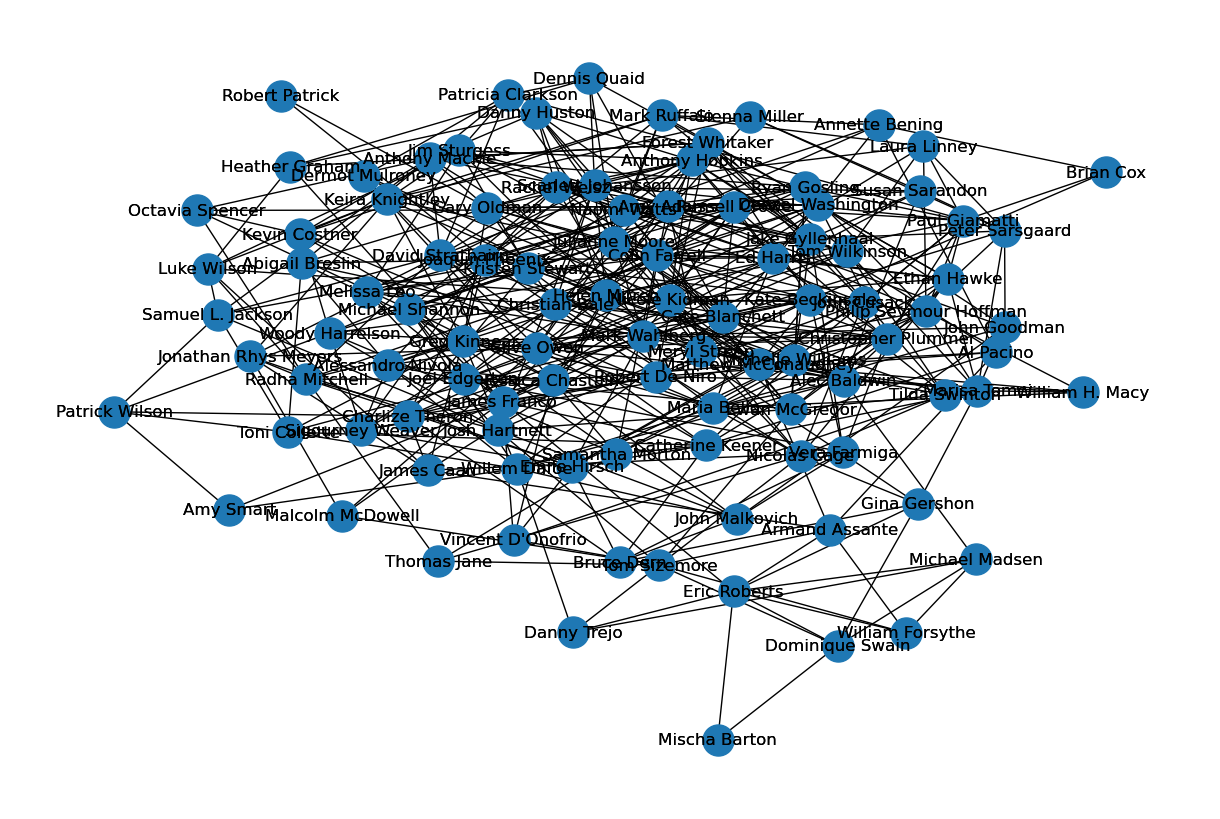

In [9]:
top_actors = sorted(closeness_centrality, key = closeness_centrality.get, reverse = True)[:top_k]
top_graph = g.subgraph(top_actors)
plt.figure(figsize = (12, 8))
pos = nx.kamada_kawai_layout(top_graph)
nx.draw(top_graph, pos, with_labels = True, node_size = 500, font_size = 12)
labels = {node:g.nodes[node]['name'] for node in top_graph.nodes()}
nx.draw_networkx_labels(top_graph, pos, labels, font_size = 12)
plt.show()